## Every Dream v2 RunPod Installer

[General Instructions](https://github.com/victorchall/EveryDream2trainer/blob/main/README.md)

You can sign up for Runpod here (shameless referral link): [Runpod](https://runpod.io/?ref=oko38cd0)


### Are you ready?

You will want to have your data prepared before starting, and have a rough training plan in mind. 

**Don't waste rental fees if you're not fully prepared to start training.**

### Spin up a training pod 
Pick an A5000/3090 or better pod. Secure cloud tends to be more reliable. 

On-demand (default) pods will not get shut down in the middle of training.

**Data loss may result if you use spot pricing** 

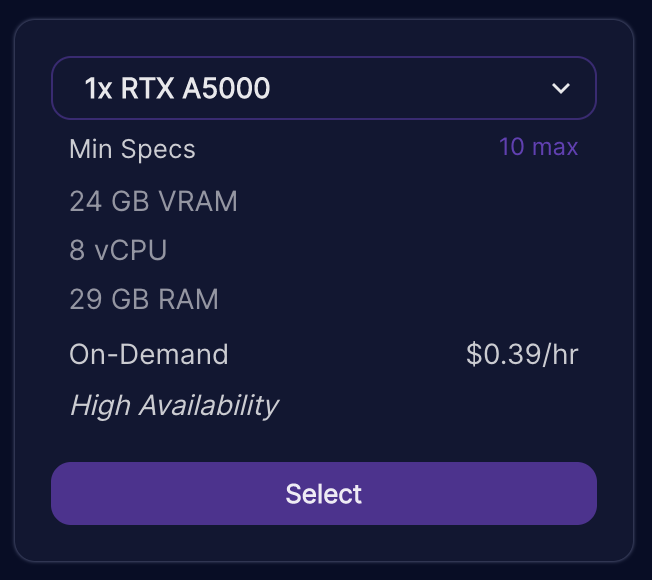

Select the `RunPod Stable Diffusion v2.1` template. _The `RunPod PyTorch` template does not work due to an old version of Python._ 

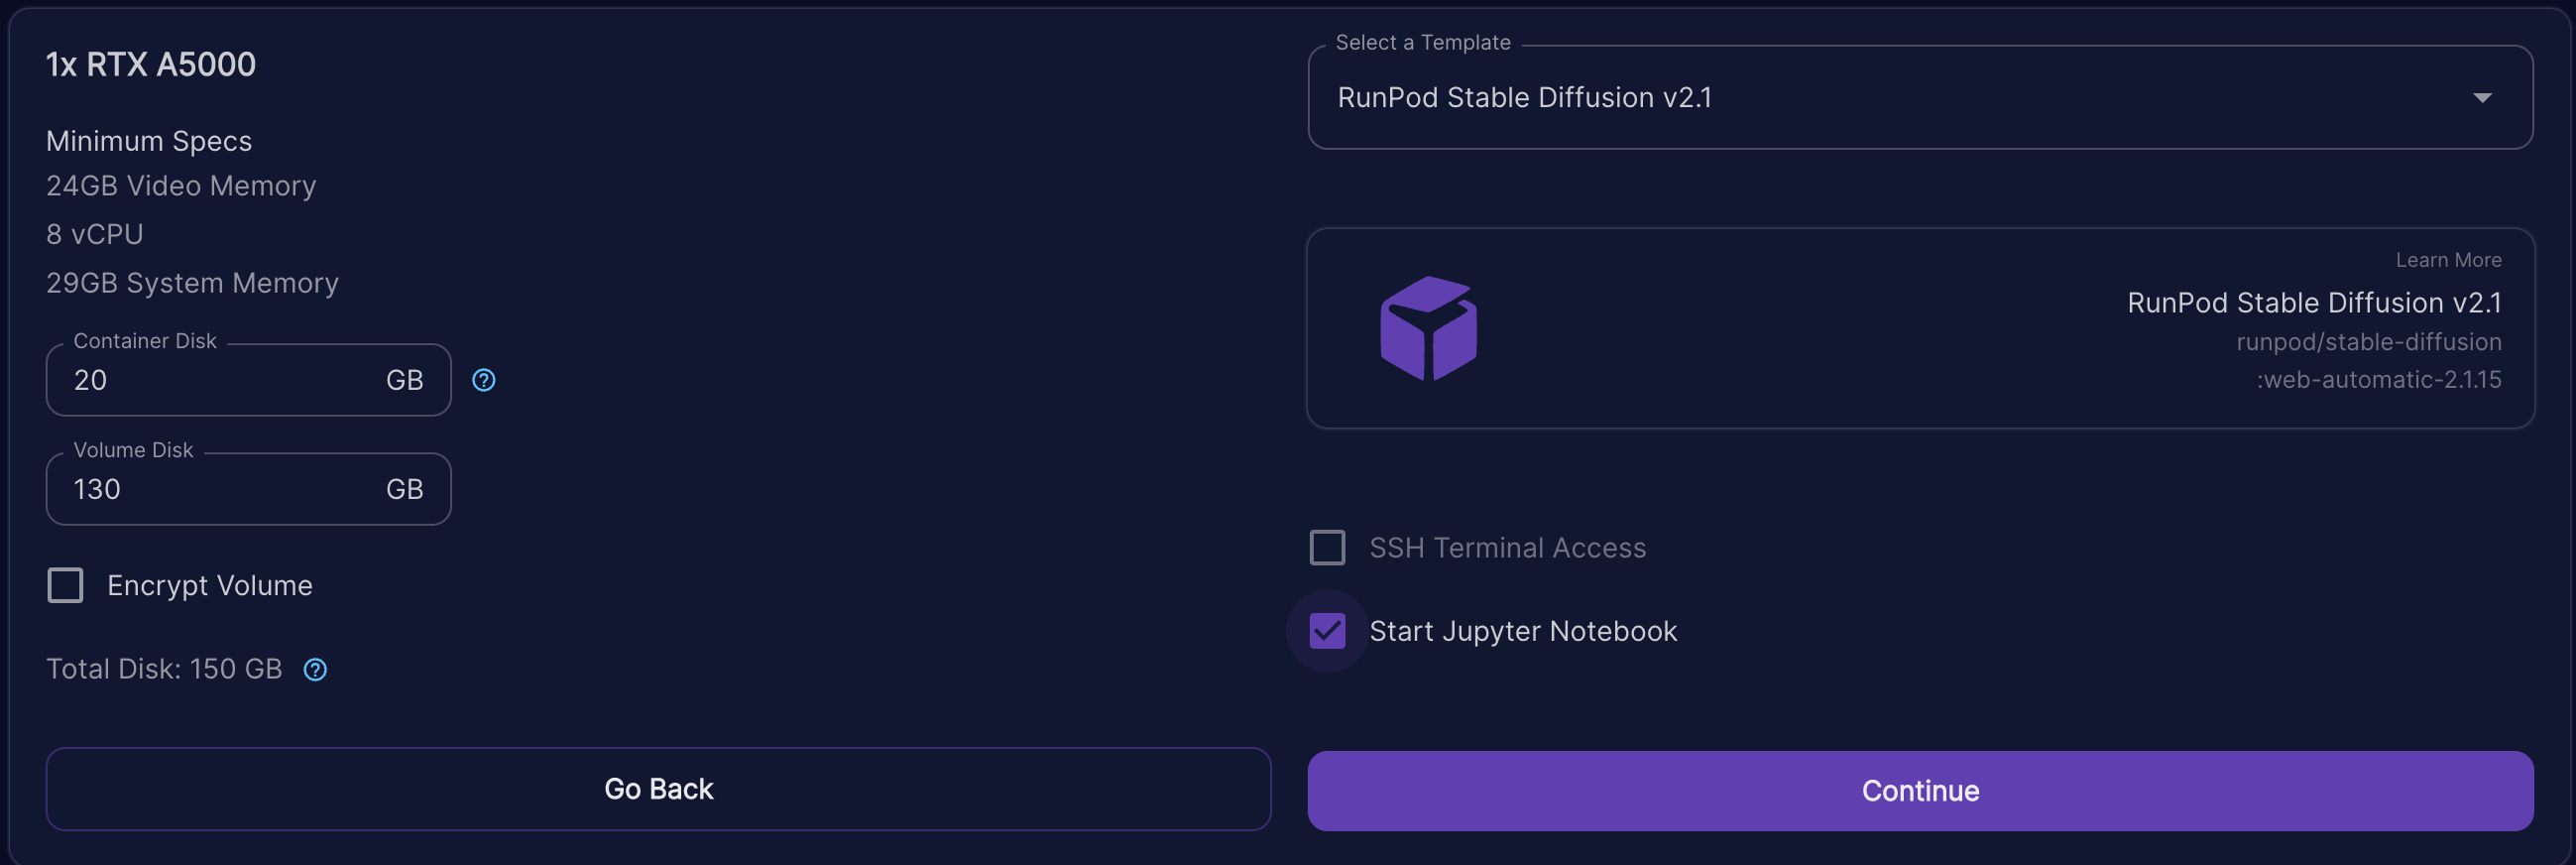

#### A note on storage

Remember, on RunPod time is more expensive than storage. 

Which is good, because running a lot of experiments can generate a lot of data. Not having the right save points to recover quickly from inevitable mistakes will cost you a lot of time.

When in doubt, give yourself ~125GB of Runpod **Volume** storage.

#### Install EveryDream 2
Open this notebook with `File > Open from URL...` pointing to `https://raw.githubusercontent.com/victorchall/EveryDream2trainer/main/installers/Runpod.ipynb`

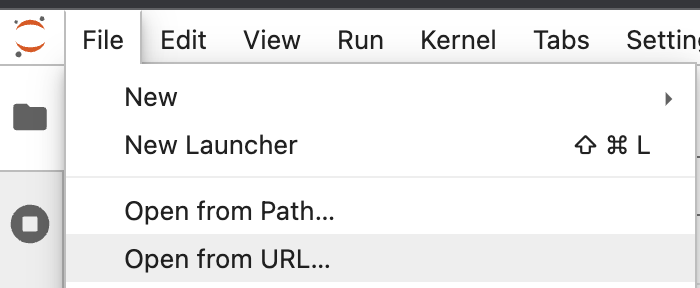

New run each of the cells below, paying attention to the provided instructions.



## Install EveryDream

In [ ]:
import os

%cd /workspace

if not os.path.exists("EveryDream2trainer"):
    !git clone https://github.com/victorchall/EveryDream2trainer

%cd EveryDream2trainer
%mkdir input
%run utils/get_yamls.py

!echo pass > /workspace/stable-diffusion-webui/relauncher.py

### Check your VRAM
If you see `22000 MB` or lower, then trash your pod and pick an A5000/3090 or better pod next time

If you see `24576 MB` or higher you are good to go, but notice that there are `3500 MB` being taken up by Automatic 1111.

Simply killing the web-ui won't free up that VRAM, but fortunately we added a hack to disable it above.

Unfortunately it will require a pod restart once everything is installed.

In [ ]:
!grep Swap /proc/meminfo
!swapon -s
!nvidia-smi

## Upload training files

Use the navigation on the left to open the **/workspace/EveryDream2trainer/input** folder and upload your training files using the **up arrow button** above the file explorer, or by dragging and dropping the files from your local machine onto the file explorer.

If you have many training files, or nested folders of training data, create a zip archive of your training data, upload this file to the input folder, then right click on the zip file and select "Extract Archive".

### Optional - Configure sample prompts
You can set your own sample prompts by adding them, one line at a time, to sample_prompts.txt.

Keep in mind a longer list of prompts will take longer to generate. You may also want to adjust you sample_steps in the training notebook to a different value to get samples left often. This is probably a good idea when training a larger dataset that you know will take longer to train, where more frequent samples will not help you.

## While your training data is uploading, go ahead to install the dependencies below
**This will a few minutes.  Wait until it says "DONE" to move on.** 
You can ignore "warnings."

In [ ]:
!python -m pip install --upgrade pip

!pip install requests==2.25.1
!pip install -U -I torch==1.13.1+cu117 torchvision==0.14.1+cu117 --extra-index-url "https://download.pytorch.org/whl/cu117"
!pip install transformers==4.25.1
!pip install -U diffusers[torch]

!pip install pynvml==11.4.1
!pip install bitsandbytes==0.35.0
!pip install ftfy==6.1.1
!pip install aiohttp==3.8.3

!pip uninstall -y tb-nightly tensorboard
!pip install "tensorboard>=2.11.0"

!pip install protobuf==3.20.2
!pip install wandb==0.13.6
!pip install colorama==0.4.5
!pip install -U triton
!pip install --pre -U xformers
    
print("DONE")

## RESTART (not reset) your pod now
The A1111 web ui will no longer load, and we will free up the rest of that VRAM. 

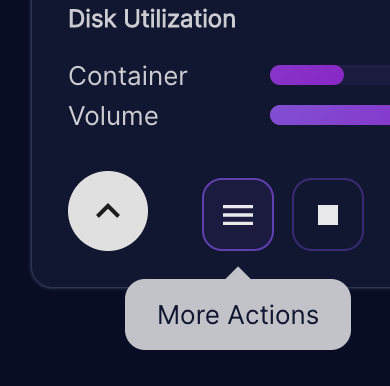
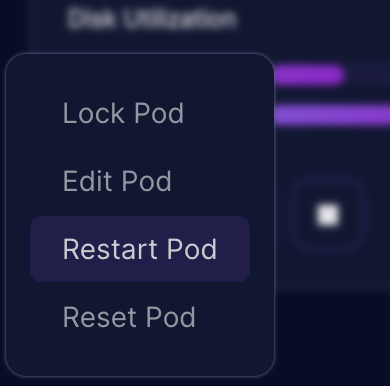

**_After restarting, reload_** this page and head on over to [EveryDream2trainer/Train_JupyterLab.ipynb](EveryDream2trainer/Train_JupyterLab.ipynb) to start training!